In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn import metrics
import seaborn as ss
import os
from os import listdir

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/parkinsons-disease-pd-data-analysis/Parkinsons_Speech-Features.csv


#### Reading the CSV File

In [3]:
df=pd.read_csv("/kaggle/input/parkinsons-disease-pd-data-analysis/Parkinsons_Speech-Features.csv")

In [4]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
df.shape

(756, 755)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [8]:
df.isna().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [9]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


#### Data Processing

In [10]:
x = df.iloc[:, 0:754].values
y = df.iloc[:, -1].values 

In [11]:
from sklearn.preprocessing import StandardScaler
x= StandardScaler().fit_transform(x)

#### Data Processing : Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1645)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [14]:
x_train.shape

(604, 754)

In [15]:
x_test.shape

(152, 754)

#### Classification : K-Nearest Neighbor

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_KNN = time.time()

modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(x_train, y_train)

y_predKNN = modelKNN.predict(x_test)

accuracy_KNN = accuracy_score(y_test, y_predKNN)
precision_KNN = precision_score(y_test, y_predKNN, average='weighted')
recall_KNN = recall_score(y_test, y_predKNN, average='weighted')
f1_KNN = f1_score(y_test, y_predKNN, average='weighted')

end_time_KNN = time.time()
time_KNN = end_time_KNN - start_time_KNN

print('KNN - Accuracy  : %.2f' % (accuracy_KNN*100), '%')
print('KNN - F1-Score  : %.2f' % (f1_KNN*100), '%')
print('KNN - Recall    : %.2f' % (recall_KNN*100), '%')
print('KNN - Precision : %.2f' % (precision_KNN*100), '%')
print('KNN - Time Taken : %.2f' % time_KNN, 'seconds')

KNN - Accuracy  : 83.55 %
KNN - F1-Score  : 81.72 %
KNN - Recall    : 83.55 %
KNN - Precision : 83.96 %
KNN - Time Taken : 0.02 seconds


#### Classification : Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_LR = time.time()

modelLR = LogisticRegression(solver='newton-cg',max_iter=1000)
modelLR.fit(x_train, y_train)

y_predLR = modelLR.predict(x_test)

accuracy_LR = accuracy_score(y_test, y_predLR)
precision_LR = precision_score(y_test, y_predLR, average='weighted')
recall_LR = recall_score(y_test, y_predLR, average='weighted')
f1_LR = f1_score(y_test, y_predLR, average='weighted')

end_time_LR = time.time()
time_LR = end_time_LR - start_time_LR

print('LR - Accuracy  : %.2f' % (accuracy_LR*100), '%')
print('LR - F1-Score  : %.2f' % (f1_LR*100), '%')
print('LR - Recall    : %.2f' % (recall_LR*100), '%')
print('LR - Precision : %.2f' % (precision_LR*100), '%')
print('LR - Time Taken : %.2f' % time_LR, 'seconds')

LR - Accuracy  : 82.89 %
LR - F1-Score  : 81.13 %
LR - Recall    : 82.89 %
LR - Precision : 82.85 %
LR - Time Taken : 0.16 seconds


#### Classification : Support Vector Machine

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_SVM = time.time()

modelSVM_RBF = SVC(kernel = 'linear')
modelSVM_RBF.fit(x_train, y_train)

y_predSVM_RBF = modelSVM_RBF.predict(x_test)

accuracy_SVM = accuracy_score(y_test, y_predSVM_RBF)
precision_SVM = precision_score(y_test, y_predSVM_RBF, average='weighted')
recall_SVM = recall_score(y_test, y_predSVM_RBF, average='weighted')
f1_SVM = f1_score(y_test, y_predSVM_RBF, average='weighted')

end_time_SVM = time.time()
time_SVM = end_time_SVM - start_time_SVM

print('SVM - Accuracy  : %.2f' % (accuracy_SVM*100), '%')
print('SVM - F1-Score  : %.2f' % (f1_SVM*100), '%')
print('SVM - Recall    : %.2f' % (recall_SVM*100), '%')
print('SVM - Precision : %.2f' % (precision_SVM*100), '%')
print('KNN - Time Taken : %.2f' % time_SVM, 'seconds')

SVM - Accuracy  : 82.89 %
SVM - F1-Score  : 81.87 %
SVM - Recall    : 82.89 %
SVM - Precision : 82.21 %
KNN - Time Taken : 0.08 seconds


#### Classification : Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_RFC = time.time()

modelRFC = RandomForestClassifier(n_estimators = 754, criterion = 'gini')
modelRFC.fit(x_train, y_train)

y_predRFC = modelRFC.predict(x_test)

accuracy_RFC = accuracy_score(y_test, y_predRFC)
precision_RFC = precision_score(y_test, y_predRFC, average='weighted')
recall_RFC = recall_score(y_test, y_predRFC, average='weighted')
f1_RFC = f1_score(y_test, y_predRFC, average='weighted')

end_time_RFC = time.time()
time_RFC = end_time_RFC - start_time_RFC

print('RFC - Accuracy  : %.2f' % (accuracy_RFC*100), '%')
print('RFC - F1-Score  : %.2f' % (precision_RFC*100), '%')
print('RFC - Recall    : %.2f' % (recall_RFC*100), '%')
print('RFC - Precision : %.2f' % (f1_RFC*100), '%')
print('RFC - Time Taken : %.2f' % time_RFC, 'seconds')

RFC - Accuracy  : 83.55 %
RFC - F1-Score  : 85.42 %
RFC - Recall    : 83.55 %
RFC - Precision : 81.12 %
RFC - Time Taken : 9.43 seconds


#### Classification : Hist Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(123)

import time
start_time_HGBC = time.time()

modelHGBC = HistGradientBoostingClassifier()
modelHGBC.fit(x_train, y_train)

y_predHGBC = modelHGBC.predict(x_test)

accuracy_HGBC = accuracy_score(y_test, y_predHGBC)
precision_HGBC = precision_score(y_test, y_predHGBC, average='weighted')
recall_HGBC = recall_score(y_test, y_predHGBC, average='weighted')
f1_HGBC = f1_score(y_test, y_predHGBC, average='weighted')

end_time_HGBC = time.time()
time_HGBC = end_time_HGBC - start_time_HGBC

print('HGBC - Accuracy  : %.2f' % (accuracy_HGBC*100), '%')
print('HGBC - F1-Score  : %.2f' % (f1_HGBC*100), '%')
print('HGBC - Recall    : %.2f' % (recall_HGBC*100), '%')
print('HGBC - Precision : %.2f' % (precision_HGBC*100), '%')
print('HGBC - Time Taken : %.2f' % time_HGBC, 'seconds')

HGBC - Accuracy  : 87.50 %
HGBC - F1-Score  : 86.31 %
HGBC - Recall    : 87.50 %
HGBC - Precision : 88.61 %
HGBC - Time Taken : 4.85 seconds


#### Classification : Light Gradient Boosting Machine

In [34]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


np.random.seed(123)

import time
start_time_GBM = time.time()

modelGBM = LGBMClassifier()
modelGBM.fit(x_train, y_train)

y_pred_GBM = modelGBM.predict(x_test)

accuracy_GBM = accuracy_score(y_test, y_pred_GBM)
precision_GBM = precision_score(y_test, y_pred_GBM, average='weighted')
recall_GBM = recall_score(y_test, y_pred_GBM, average='weighted')
f1_GBM = f1_score(y_test, y_pred_GBM, average='weighted')

end_time_GBM = time.time()
time_GBM = end_time_GBM - start_time_GBM

print('Light-GBM - Accuracy  : %.2f' % (accuracy_GBM*100), '%')
print('Light-GBM - F1-Score  : %.2f' % (f1_GBM*100), '%')
print('Light-GBM - Recall    : %.2f' % (recall_GBM*100), '%')
print('Light-GBM - Precision : %.2f' % (precision_GBM*100), '%')
print('Light-GBM - Time Taken : %.2f' % time_GBM, 'seconds')

Light-GBM - Accuracy  : 86.84 %
Light-GBM - F1-Score  : 85.26 %
Light-GBM - Recall    : 86.84 %
Light-GBM - Precision : 88.85 %
Light-GBM - Time Taken : 3.20 seconds


#### Tabular Comparison

In [35]:
from tabulate import tabulate

head = ["Classifier", "Accuracy", "Precision", "Recall", "Accuracy"]

mydata = [
    ["KNN", accuracy_KNN*100, precision_KNN*100, recall_KNN*100, f1_KNN*100],
    ["SVM", accuracy_SVM*100, precision_SVM*100, recall_SVM*100, f1_SVM*100],
    ["RFC", accuracy_RFC*100, precision_RFC*100, recall_RFC*100, f1_RFC*100],
    ["LR", accuracy_LR*100, precision_LR*100, recall_LR*100, f1_LR*100],
    ["HGBC",accuracy_HGBC*100,precision_HGBC*100,recall_HGBC*100,f1_HGBC*100],
    ["Light-GBM", accuracy_GBM*100, precision_GBM*100, recall_GBM*100, f1_GBM*100]
]

print(tabulate(mydata, headers=head, tablefmt="simple"))

Classifier      Accuracy    Precision    Recall    Accuracy
------------  ----------  -----------  --------  ----------
KNN              83.5526      83.9635   83.5526     81.7208
SVM              82.8947      82.2086   82.8947     81.8672
RFC              83.5526      85.4221   83.5526     81.1188
LR               82.8947      82.8548   82.8947     81.1308
HGBC             87.5         88.6068   87.5        86.3099
Light-GBM        86.8421      88.8509   86.8421     85.2636


#### Classification : Neural Networks

In [94]:
import keras
from keras.callbacks import CSVLogger
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
import time
import tensorflow as tf

np.random.seed(123)
tf.random.set_seed(123)

csv_logger = CSVLogger('pd.csv', append=False, separator=';')

classifier = Sequential()
classifier.add(Dense(75, input_shape = x_train[1].shape))

classifier.add(Dense(150))
classifier.add(LeakyReLU(alpha=0.15))
classifier.add(Dropout(rate=0.3))

classifier.add(Dense(10))
classifier.add(LeakyReLU(alpha=0.15))
classifier.add(Dropout(rate=0.2))

classifier.add(Dense(1, activation='sigmoid'))

start_time = time.time()
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'] )
classifier.fit(x_train, y_train, validation_split= 0.2, epochs=100, batch_size=5, callbacks=[csv_logger])
end_time = time.time()

Epoch 1/100
97/97 [==============================] - 2s 5ms/step - loss: 0.5279 - accuracy: 0.7702 - val_loss: 0.4718 - val_accuracy: 0.7603
Epoch 2/100
97/97 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8571 - val_loss: 0.4129 - val_accuracy: 0.8264
Epoch 3/100
97/97 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.8923 - val_loss: 0.4078 - val_accuracy: 0.8347
Epoch 4/100
97/97 [==============================] - 0s 4ms/step - loss: 0.1848 - accuracy: 0.9130 - val_loss: 0.3311 - val_accuracy: 0.8595
Epoch 5/100
97/97 [==============================] - 0s 3ms/step - loss: 0.1522 - accuracy: 0.9296 - val_loss: 0.3501 - val_accuracy: 0.8843
Epoch 6/100
97/97 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.9565 - val_loss: 0.3963 - val_accuracy: 0.8512
Epoch 7/100
97/97 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9689 - val_loss: 0.3954 - val_accuracy: 0.8678
Epoch 8/100
9

In [95]:
time_taken = end_time - start_time
print("Time : %.3f" % time_taken, 'seconds')

Time : 42.144 seconds


In [96]:
print("Evaluation on test data : ")
results = classifier.evaluate(x_test, y_test, batch_size=5)
accuracyANN = results[1]*100
print("Test Accuracy : %.2f" % accuracyANN,'%')

Evaluation on test data : 
31/31 [==============================] - 0s 1ms/step - loss: 2.3792 - accuracy: 0.8289
Test Accuracy : 82.89 %


#### Confusion Matrix

In [108]:
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix

test_pred = classifier.predict(x_test)
y_pred = np.argmax(test_pred, axis=1)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

5/5 [==============================] - 0s 2ms/step


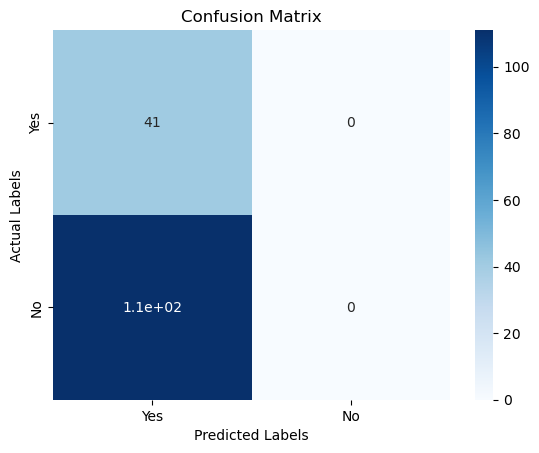

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

labels = ['Yes', 'No'] 

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')

plt.savefig("Confusion Matrix.png", dpi=1000, format='png')
plt.show()
